# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [155]:
df_colors = pd.read_csv('./data/colors.csv')
df_sets = pd.read_csv('./data/sets.csv')
df_themes = pd.read_csv('./data/themes.csv')

In [156]:
unique_color_count = df_colors['name'].nunique(dropna=True)
print(f"number of unique colors = {unique_color_count}")

number of unique colors = 135


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [157]:
trans_color_count = len(df_colors[df_colors['is_trans']=='t'])
opaque_color_count = len(df_colors[df_colors['is_trans']=='f'])
print(f"we have {trans_color_count} transparent colors")
print(f"we have {opaque_color_count} opaque colors")

we have 28 transparent colors
we have 107 opaque colors


In [158]:
# another way...
trans_color_count2 = len(df_colors[df_colors['is_trans']=='t'])
opaque_color_count2 = len(df_colors) - trans_color_count2
print(f"we have {trans_color_count2} transparent colors")
print(f"we have {opaque_color_count2} opaque colors")

we have 28 transparent colors
we have 107 opaque colors


# Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="./assets/lego_themes.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="./assets/lego_sets.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [159]:
first_two = df_sets[:2]
last_two = df_sets[-2:]

print(first_two)
print("="*80)
print(last_two)

  set_num               name  year  theme_id  num_parts
0   001-1              Gears  1965         1         43
1  0011-2  Town Mini-Figures  1978        84         12
           set_num                             name  year  theme_id  num_parts
15708      XWING-2                X-Wing Trench Run  2019       158         52
15709  YODACHRON-1  Yoda Chronicles Promotional Set  2013       158        413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [160]:
earliest_year = min(df_sets['year'].values)
print(f"earliest year = {earliest_year}")
df_sets_first = df_sets[df_sets['year'] == earliest_year]
first_set_names = df_sets_first['name'].values.tolist()
print("These were the sets released:")
for _set in first_set_names:
    print(f" - {_set}")

earliest year = 1949
These were the sets released:
 - Extra-Large Gift Set (ABB)
 - Large Gift Set (ABB)
 - Medium Gift Set (ABB)
 - Small Brick Set (ABB)
 - Small Doors and Windows Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [161]:
num_of_different_sets_1949 = len(set(first_set_names))
print(f"LEGO sold {num_of_different_sets_1949} different sets in 1949")

first_theme_count = df_sets_first['theme_id'].nunique()
print(f"There were {first_theme_count} different themes on offer in 1949")

LEGO sold 5 different sets in 1949
There were 2 different themes on offer in 1949


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [162]:
result = df_sets.sort_values(by='num_parts', ascending=False).head()
result['name'].values.tolist()

['The Ultimate Battle for Chima',
 'UCS Millennium Falcon',
 'Hogwarts Castle',
 'Taj Mahal',
 'Taj Mahal']

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [163]:
yoy_groups = df_sets.groupby('year')
yoy_counts = yoy_groups.count()
yoy1955 = yoy_groups.get_group(1955)
yoy2019 = yoy_groups.get_group(2019)
print(f"{len(yoy1955)} sets released in 1955")
print(f"{len(yoy2019)} sets released in 2019")

28 sets released in 1955
840 sets released in 2019


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

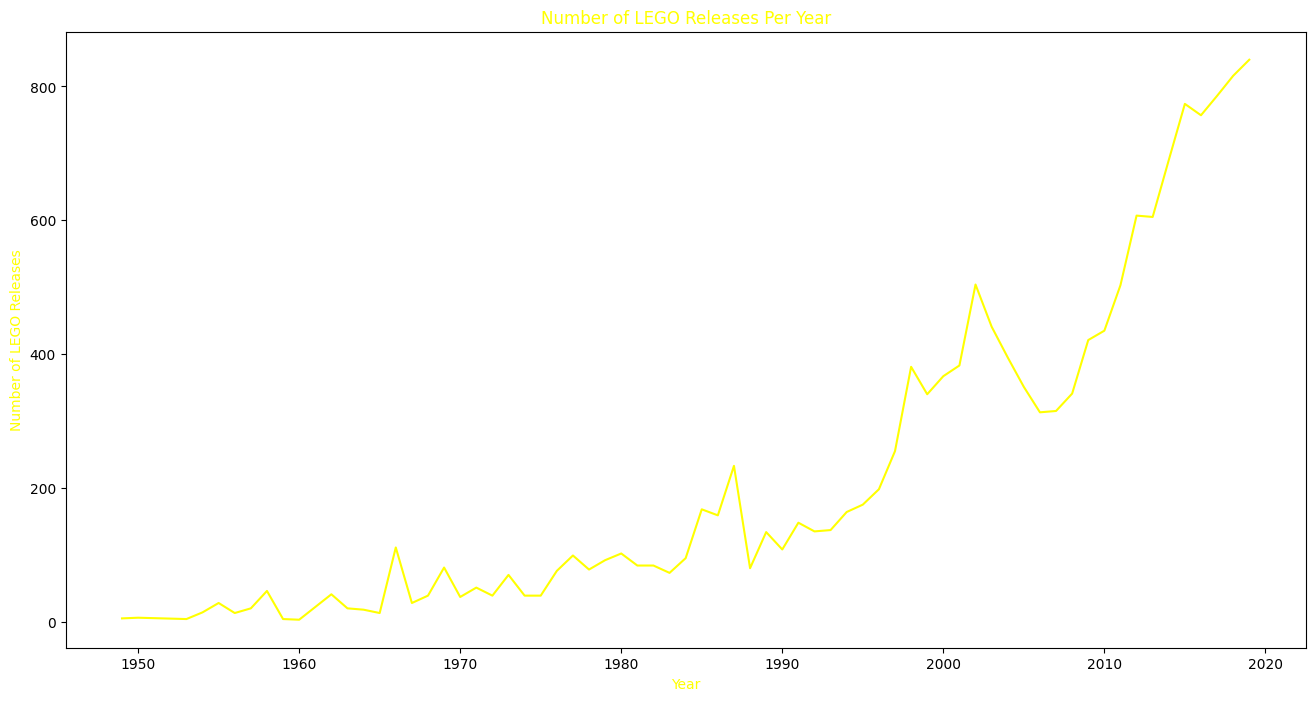

In [164]:
_df = yoy_counts[:-2]
_years = _df.index.tolist()
_release_counts = _df['name'].values.tolist()

plt.figure(figsize=(16,8))
plt.title("Number of LEGO Releases Per Year", color='yellow')
plt.xlabel("Year", color='yellow')
plt.ylabel("Number of LEGO Releases", color='yellow')
plt.plot(_years, _release_counts, color='yellow')

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [165]:
_years = df_sets['year'].unique().tolist()
_years = sorted(_years)
_yearly_theme_counts = [0] * len(_years)

for y in range(len(_years)):
    _year_filter = df_sets[df_sets['year']==_years[y]]
    _unique_theme_ids = _year_filter['theme_id'].unique().tolist()
    _yearly_theme_counts[y] = len(_unique_theme_ids)

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

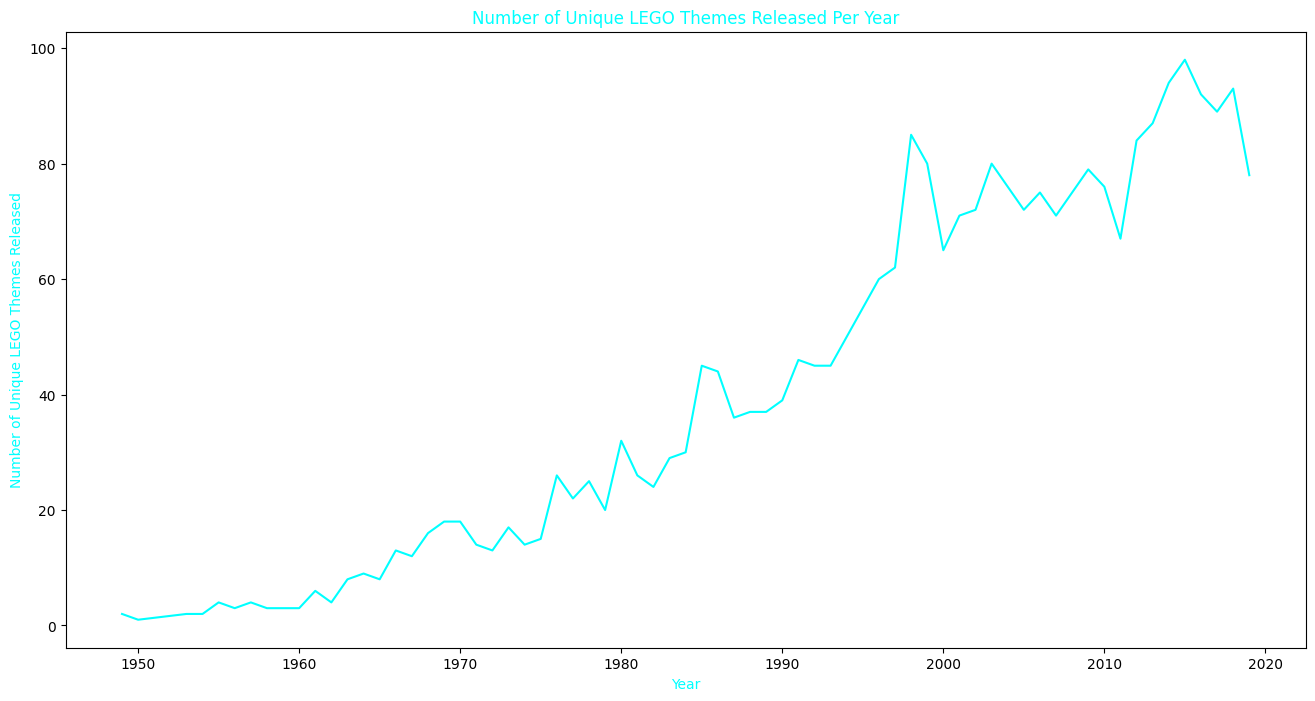

In [166]:
plt.figure(figsize=(16,8))
plt.title("Number of Unique LEGO Themes Released Per Year", color='cyan')
plt.xlabel("Year", color='cyan')
plt.ylabel("Number of Unique LEGO Themes Released", color='cyan')
plt.plot(_years[:-2], _yearly_theme_counts[:-2], color='cyan')

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [167]:
set_groups = df_sets.groupby('name')
set_names = set_groups.count().index.unique().tolist()
average_part_counts = [0] * len(set_names)

for sn in range(len(set_names)):
    _set_name = set_names[sn]
    _set_name_group = df_sets[df_sets['name']==_set_name]
    _num_parts = _set_name_group['num_parts'].values.tolist()
    average_part_counts[sn] = sum(_num_parts) // len(_num_parts)

<BarContainer object of 13437 artists>

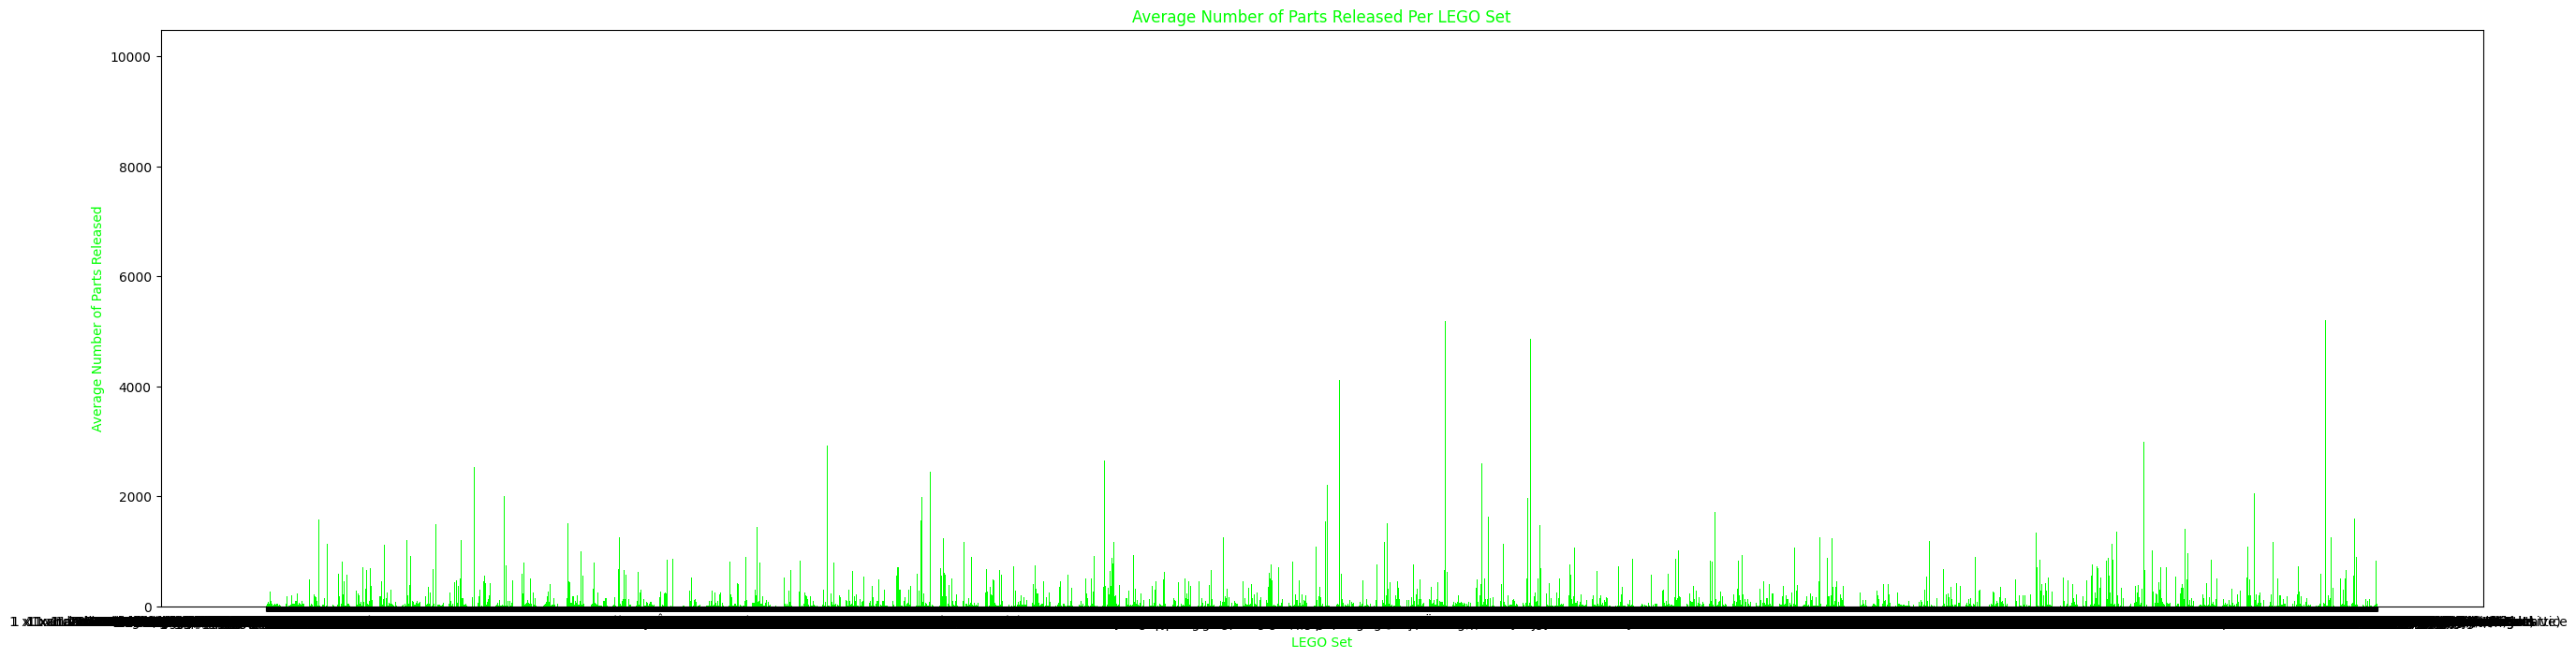

In [168]:
plt.figure(figsize=(32,8))
plt.title("Average Number of Parts Released Per LEGO Set", color='lime')
plt.xlabel("LEGO Set", color='lime')
plt.ylabel("Average Number of Parts Released", color='lime')
plt.bar(set_names, average_part_counts, color='lime')

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

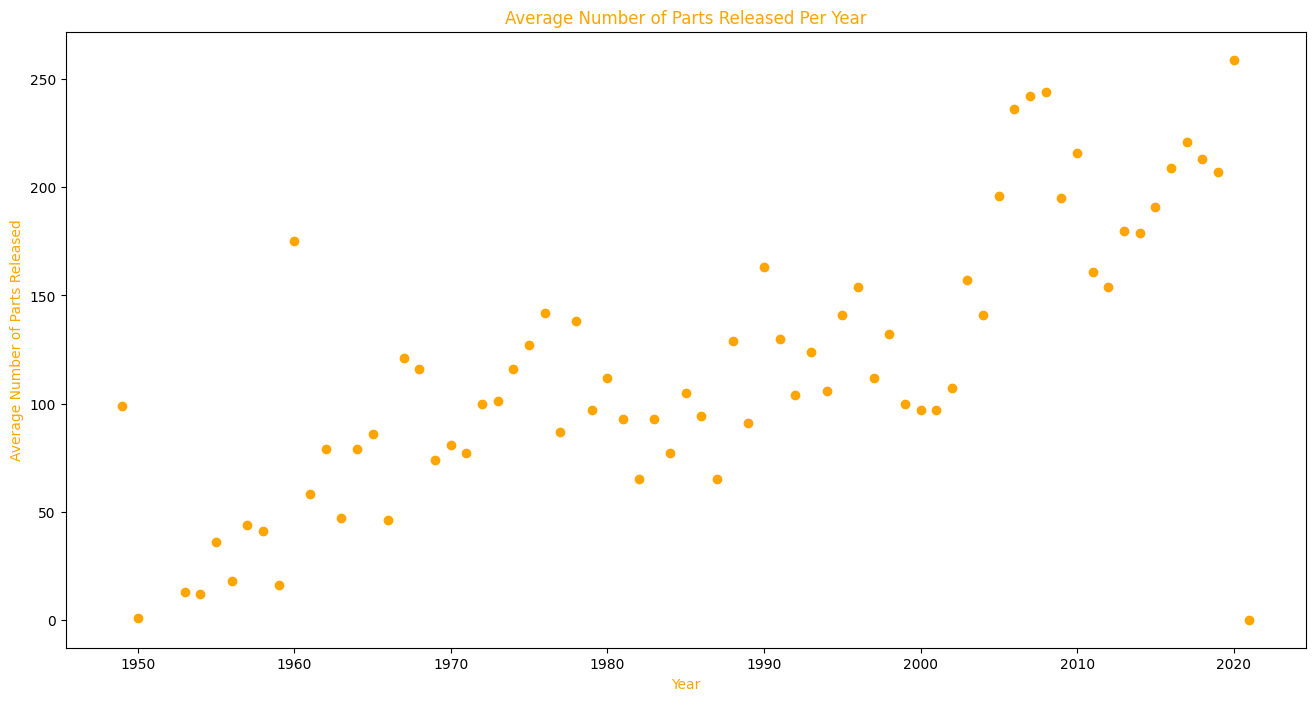

In [169]:
df_sets.sort_values(by='year')

_years = df_sets['year'].unique().tolist()
_years = sorted(_years)
_yearly_average_part_counts = [0] * len(_years)

for y in range(len(_years)):
    _year_filter = df_sets[df_sets['year']==_years[y]]
    _num_part_vals = _year_filter['num_parts'].values.tolist()
    _yearly_average_part_counts[y] = sum(_num_part_vals) // len(_num_part_vals)
    
plt.figure(figsize=(16,8))
plt.title("Average Number of Parts Released Per Year", color='orange')
plt.xlabel("Year", color='orange')
plt.ylabel("Average Number of Parts Released", color='orange')
plt.scatter(_years, _yearly_average_part_counts, color='orange')

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

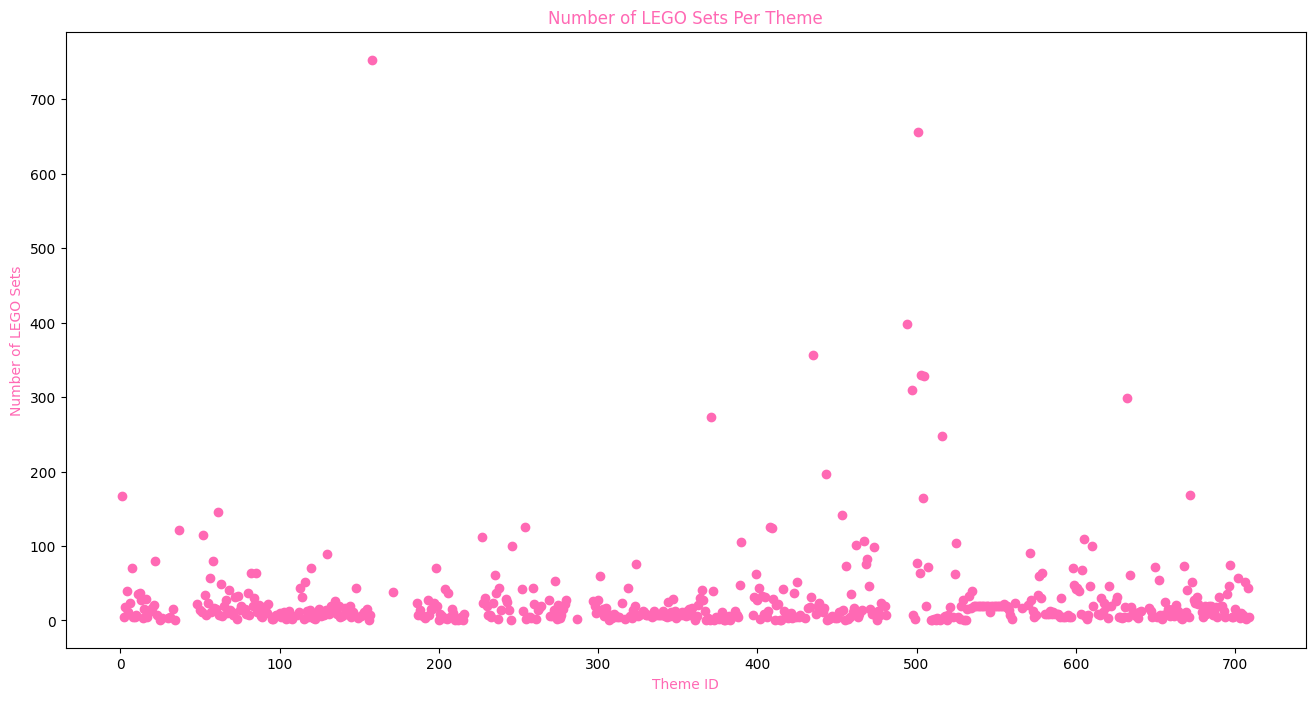

In [170]:
unique_theme_ids = df_sets['theme_id'].unique().tolist()
set_counts_per_theme = [0]*len(unique_theme_ids)

for uti in range(len(unique_theme_ids)):
    _theme_id = unique_theme_ids[uti]
    _theme_id_count = len(df_sets[df_sets['theme_id']==_theme_id])
    set_counts_per_theme[uti] = _theme_id_count
    
plt.figure(figsize=(16,8))
plt.title("Number of LEGO Sets Per Theme", color='hotpink')
plt.xlabel("Theme ID", color='hotpink')
plt.ylabel("Number of LEGO Sets", color='hotpink')
plt.scatter(unique_theme_ids, set_counts_per_theme, color='hotpink')

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="./assets/rebrickable_schema.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [171]:
star_wars_themes = df_themes[df_themes['name']=='Star Wars']
star_wars_theme_ids = star_wars_themes['id'].values.tolist()

In [172]:
sets_per_star_wars_id = [0] * len(star_wars_theme_ids)

for swti in range(len(star_wars_theme_ids)):
    _sw_theme_id = star_wars_theme_ids[swti]
    _sets_with_theme_id = df_sets[df_sets['theme_id']==_sw_theme_id]
    sets_per_star_wars_id[swti] = _sets_with_theme_id['name'].values.tolist()
    
print(sets_per_star_wars_id)

[['R2-D2 / C-3PO Droid Collectors Set', 'Pit Droid', 'Battle Droid', 'Destroyer Droid', 'C-3PO', 'Stormtrooper', 'R2-D2', 'Darth Vader', 'Jango Fett', 'Super Battle Droid', 'Darth Vader / Stormtrooper Kit'], ['Star Wars: Build Your Own Adventure', 'Parts for Star Wars Build Your Own Adventure: Galactic Missions', 'Clone Turbo Tank - Mini', 'Republic Attack Cruiser - Mini', 'AT-TE Walker - Mini', 'Republic Gunship - Mini', 'Imperial Shuttle - Mini', 'AT-AT Walker - Mini', 'Slave I', 'Bounty Hunter Gunship - Mini', 'Stormtrooper', 'White Boba Fett Figure', 'Shadow ARF Trooper', 'Battle Droid on STAP', 'Imperial Speeder Bike', 'Clone Walker', 'Republic Attack Shuttle - Mini', 'X-wing Fighter - Mini', 'AAT', 'Republic Attack Cruiser - Mini', 'AT-ST - Mini', 'Vulture Droid - Mini', 'Star Destroyer', "Anakin's Pod Racer", 'STAP', 'MTT', 'Z-95 Headhunter', 'Mandalorian Fighter', 'Republic Frigate', 'Umbaran MHC', "Anakin's Jedi Intercepter", 'Imperial Shuttle', 'ARC-170 Starfighter', 'A-Wing 

### Merging (i.e., Combining) DataFrames based on a Key


In [173]:
set_theme_count = df_sets['theme_id'].value_counts()

In [174]:
set_theme_count = pd.DataFrame({
    'id':set_theme_count.index,
    'set_count':set_theme_count.values
})

In [153]:
merged_df = pd.merge(set_theme_count, df_themes, on='id')